In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [2]:
car_df=pd.read_csv("/Users/samuelvonpaayssoh/Desktop/SMU/DS7331-ML1/vehicles.csv")

In [3]:
car_df= car_df.drop(['Unnamed: 0','url','region_url', 'description'],axis=1)
pd.set_option('display.max_columns', None)
car_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,state,lat,long,posting_date
0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
car_df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'image_url', 'state', 'lat',
       'long', 'posting_date'],
      dtype='object')

In [5]:
car_df['year'].dropna(inplace=True)

In [6]:
car_df['year'].sort_values().unique()

array([1900., 1910., 1911., 1912., 1913., 1914., 1915., 1918., 1919.,
       1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928.,
       1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937.,
       1938., 1939., 1940., 1941., 1942., 1943., 1945., 1946., 1947.,
       1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956.,
       1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965.,
       1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974.,
       1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983.,
       1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992.,
       1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020., 2021.])

In [7]:
#df1.apply(lambda row: row.year.value_counts() / len(df1) * 100, axis=1)
# df1.sort_values(by='year %')
# df1.head()
#df.loc[df["Y"]>0,'new'] 
a = car_df['year'].value_counts() / len(car_df) * 100
a.sort_values()


1919.0    0.000218
1920.0    0.000218
1918.0    0.000218
1915.0    0.000218
1910.0    0.000218
            ...   
2016.0    6.976232
2015.0    7.116559
2013.0    7.287441
2014.0    7.473162
2017.0    9.254430
Name: year, Length: 110, dtype: float64

In [8]:
a=pd.DataFrame(a).reset_index()
a.columns=['year','percent']
a

,year,percent
0,2017.0,9.254430
1,2014.0,7.473162
2,2013.0,7.287441
3,2015.0,7.116559
4,2016.0,6.976232
...,...,...
105,1921.0,0.000218
106,1913.0,0.000218
107,1922.0,0.000218
108,1910.0,0.000218


In [9]:
car_df=pd.merge(car_df,a,on='year')
car_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,state,lat,long,posting_date,percent
0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600,4.220963
1,7237318515,auburn,5995,2010.0,hyundai,tucson,NaN,NaN,gas,126000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00O0O_hmpZECNGvn...,al,32.623299,-85.481787,2020-11-26T10:57:06-0600,4.220963
2,7235940317,auburn,4500,2003.0,ford,f-150,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00606_bW4SoRpyFr...,al,32.621200,-85.184000,2020-11-23T14:58:22-0600,4.220963
3,7232651921,auburn,0,2014.0,ram,NaN,NaN,NaN,diesel,0.0,clean,automatic,NaN,NaN,NaN,other,white,https://images.craigslist.org/00303_eLTsWH0uS8...,al,NaN,NaN,2020-11-17T14:55:59-0600,4.220963
4,7231287950,auburn,27590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,24849.0,clean,other,5TFAZ5CN9GX019565,NaN,NaN,pickup,black,https://images.craigslist.org/00z0z_lW6En3cXGw...,al,32.590000,-85.480000,2020-11-15T08:07:57-0600,4.220963


In [10]:
# car_df1['percent'].dropna(inplace=True)
# car_df1['percent'] = car_df1['percent'].astype("float64")

In [11]:
car_df['percent'].describe()

count    457163.000000
mean          5.371223
std           2.434738
min           0.000218
25%           3.502520
50%           5.991755
75%           7.116559
max           9.254430
Name: percent, dtype: float64

In [12]:
# car_df2=car_df1

In [13]:
car_df= car_df[car_df['percent']>0.05]
car_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,state,lat,long,posting_date,percent
0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600,4.220963
1,7237318515,auburn,5995,2010.0,hyundai,tucson,NaN,NaN,gas,126000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00O0O_hmpZECNGvn...,al,32.623299,-85.481787,2020-11-26T10:57:06-0600,4.220963
2,7235940317,auburn,4500,2003.0,ford,f-150,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00606_bW4SoRpyFr...,al,32.621200,-85.184000,2020-11-23T14:58:22-0600,4.220963
3,7232651921,auburn,0,2014.0,ram,NaN,NaN,NaN,diesel,0.0,clean,automatic,NaN,NaN,NaN,other,white,https://images.craigslist.org/00303_eLTsWH0uS8...,al,NaN,NaN,2020-11-17T14:55:59-0600,4.220963
4,7231287950,auburn,27590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,24849.0,clean,other,5TFAZ5CN9GX019565,NaN,NaN,pickup,black,https://images.craigslist.org/00z0z_lW6En3cXGw...,al,32.590000,-85.480000,2020-11-15T08:07:57-0600,4.220963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455959,7240962081,ann arbor,17341,2017.0,jeep,new compass latitude 4wd,excellent,4 cylinders,gas,39262.0,clean,automatic,3C4NJDBBXHT656567,4wd,NaN,SUV,NaN,https://images.craigslist.org/00m0m_kTs2m1LAi5...,mi,42.300673,-84.024108,2020-12-03T10:01:56-0500,0.074201
455960,7240835120,minneapolis / st paul,1900,2001.0,lexus,es300,good,6 cylinders,gas,232783.0,clean,automatic,NaN,fwd,mid-size,sedan,silver,https://images.craigslist.org/00v0v_5RtSGalcP2...,mn,44.564700,-93.326900,2020-12-02T22:15:30-0600,0.074201
455961,7240962170,greensboro,19900,2013.0,gmc,yukon 4wd 4dr 1500 slt,NaN,8 cylinders,NaN,115278.0,clean,automatic,1GKS2CE08DR270953,4wd,NaN,SUV,white,https://images.craigslist.org/00i0i_dcuUyaovnh...,nc,36.000000,-80.000000,2020-12-03T10:02:03-0500,0.074201
455962,7240955007,finger lakes,3900,2012.0,hyundai,accent,NaN,NaN,gas,70000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00Y0Y_apmQrO7sJZ...,ny,43.174000,-77.563700,2020-12-03T09:48:46-0500,0.074201


In [14]:
car_df['percent'].describe()

count    453371.000000
mean          5.415898
std           2.395184
min           0.050195
25%           3.502520
50%           5.991755
75%           7.116559
max           9.254430
Name: percent, dtype: float64

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd 
vin_df =  pd.read_csv("/Users/samuelvonpaayssoh/Desktop/SMU/DS7331-ML1/vin.csv",sep='|', encoding='latin-1')
#
class MergeTransform(BaseEstimator, TransformerMixin):
    def __init__(self,original_dataset,column_map,columns_to_drop):
        self.original_dataset = original_dataset
        self.column_map = column_map
        self.columns_to_drop = columns_to_drop
    #
    def fit(self, X, y = None):
        return self
    #
    def transform(self, X, y = None):
        #
        X = X.drop_duplicates(['VIN'])
        #
        merged_dataset = pd.merge(self.original_dataset, X, how='left',on=['VIN'])
        #
        for k,v in self.column_map:
            merged_dataset[k].fillna(v,inplace=True)
        #
        merged_dataset.drop(self.columns_to_drop,axis = 1, inplace = True)
        #
        return merged_dataset
#
transformer = MergeTransform(car_df, [['cylinders', 'EngineCylinders'],
                                       ['year', 'ModelYear'],
                                       ['fuel', 'FuelTypePrimary'],
                                       ['drive', 'DriveType'],
                                       ['transmission', 'TransmissionStyle'],
                                       ['manufacturer', 'Make'],
                                       ['model', 'Model']], 
                                     ['DriveType', 'EngineCylinders', 'EngineManufacturer', 'EngineModel', 'Make', 'Manufacturer', 'Model', 'ModelYear', 'PlantCompanyName', 'TransmissionSpeeds', 'TransmissionStyle', 'FuelTypePrimary'])
x = transformer.transform(car_df)

KeyError: 'cylinders'

In [ ]:
# df['manufacturer'].unique()

In [ ]:
# car_df[car_df['VIN']=='1G1YU3DW1A5106980']

In [ ]:
# vin_df.info()

In [ ]:
# vin_df[vin_df['VIN']=='1G1YU3DW1A5106980']

In [17]:
car_df['cylinders'].unique()

array(['8 cylinders', nan, '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '12 cylinders', '10 cylinders', '3 cylinders'],
      dtype=object)

# Separating # cylinders under cylinders column

In [18]:
car_df[['cycl','word']]= car_df.cylinders.apply(lambda x: pd.Series(str(x).split(" ")))

In [19]:
car_df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'image_url', 'state', 'lat',
       'long', 'posting_date', 'percent', 'cycl', 'word'],
      dtype='object')

In [20]:
car_df.drop(['cylinders','word'],axis=1,inplace=True)

In [21]:
car_df.rename({'cycl':"cylinders"}, inplace=True,axis=1)

In [22]:
car_df.head()

,id,region,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,state,lat,long,posting_date,percent,cylinders
0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600,4.220963,8
1,7237318515,auburn,5995,2010.0,hyundai,tucson,NaN,gas,126000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00O0O_hmpZECNGvn...,al,32.623299,-85.481787,2020-11-26T10:57:06-0600,4.220963,nan
2,7235940317,auburn,4500,2003.0,ford,f-150,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00606_bW4SoRpyFr...,al,32.621200,-85.184000,2020-11-23T14:58:22-0600,4.220963,nan
3,7232651921,auburn,0,2014.0,ram,NaN,NaN,diesel,0.0,clean,automatic,NaN,NaN,NaN,other,white,https://images.craigslist.org/00303_eLTsWH0uS8...,al,NaN,NaN,2020-11-17T14:55:59-0600,4.220963,nan
4,7231287950,auburn,27590,2016.0,toyota,tacoma double cab sr5,good,gas,24849.0,clean,other,5TFAZ5CN9GX019565,NaN,NaN,pickup,black,https://images.craigslist.org/00z0z_lW6En3cXGw...,al,32.590000,-85.480000,2020-11-15T08:07:57-0600,4.220963,6


# Removing other from cylinders column

In [23]:
car_df.drop(car_df[car_df['cylinders']=='other'].index,inplace=True)

In [24]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452268 entries, 0 to 455963
Data columns (total 23 columns):
id              452268 non-null int64
region          452268 non-null object
price           452268 non-null int64
year            451235 non-null float64
manufacturer    434490 non-null object
model           447506 non-null object
condition       261814 non-null object
fuel            449067 non-null object
odometer        397626 non-null float64
title_status    449805 non-null object
transmission    449845 non-null object
VIN             267291 non-null object
drive           319808 non-null object
size            134973 non-null object
type            340990 non-null object
paint_color     313210 non-null object
image_url       452241 non-null object
state           452268 non-null object
lat             444887 non-null float64
long            444887 non-null float64
posting_date    452241 non-null object
percent         452268 non-null float64
cylinders       452268 non-n

In [25]:
#car_df['cylinders']=car_df['cylinders'].dropna()
car_df.drop(car_df[car_df['cylinders']=='nan'].index,inplace=True)

In [26]:
car_df['cylinders'].unique()

array(['8', '6', '4', '5', '12', '10', '3'], dtype=object)

In [27]:
car_df.groupby(['cylinders','condition'])['title_status','drive'].describe()

title_status                         drive              \
                           count unique      top   freq  count unique  top   
cylinders condition                                                          
10        excellent          760      3    clean    749    732      3  4wd   
          fair                45      4    clean     39     43      3  4wd   
          good               421      4    clean    409    384      3  4wd   
          like new            74      2    clean     72     69      2  4wd   
          new                  7      1    clean      7      5      3  rwd   
          salvage              1      1  rebuilt      1      1      1  rwd   
12        excellent           59      2    clean     58     51      3  4wd   
          fair                 6      1    clean      6      5      1  4wd   
          good                47      3    clean     44     41      3  rwd   
          like new            30      1    clean     30     24      3  rwd   
          new                  2      1    clean      2      2      1  4wd   
3         excellent          179      5    clean    172    162      3  fwd   
          fair                18      3    clean     15     17      3  fwd   
          good                82      6    clean     71     70      3  fwd   
          like new            42      4    clean     39     40      3  fwd   
          new                 48      1    clean     48     48      2  fwd   
          salvage              7      3  salvage      5      6      2  fwd   
4         excellent        35007      6    clean  32614  30223      3  fwd   
          fair              1775      6    clean   1613   1579      3  fwd   
          good             19576      6    clean  18332  17287      3  fwd   
          like new          8164      5    clean   7416   7207      3  fwd   
          new                324      5    clean    302    291      3  fwd   
          salvage            189      6  salvage     87    166      3  fwd   
5         excellent          780      4    clean    746    712      3  fwd   
          fair                78      4    clean     72     73      3  fwd   
          good               641      5    clean    602    558      3  fwd   
          like new           134      3    clean    131    121      3  fwd   
          new                 12      2    clean     11     12      3  fwd   
          salvage             10      3    clean      5      6      2  fwd   
6         excellent        32171      6    clean  30675  28479      3  4wd   
          fair              2336      6    clean   2176   2079      3  4wd   
          good             36496      6    clean  35460  27846      3  4wd   
          like new          7118      5    clean   6658   6250      3  4wd   
          new                324      4    clean    307    294      3  4wd   
          salvage            195      5    clean     85    177      3  fwd   
8         excellent        21842      5    clean  21076  19998      3  4wd   
          fair              2203      6    clean   2043   2037      3  4wd   
          good             30024      6    clean  29435  25715      3  4wd   
          like new          5059      5    clean   4841   4490      3  4wd   
          new                295      4    clean    281    262      3  4wd   
          salvage            139      5    clean     68    127      3  4wd   

                            
                      freq  
cylinders condition         
10        excellent    397  
          fair          25  
          good         206  
          like new      49  
          new            3  
          salvage        1  
12        excellent     27  
          fair           5  
          good          27  
          like new      15  
          new            2  
3         excellent    109  
          fair          10  
          good          39  
          like new      30  
          new           45  
          salvage        5  
4      

In [28]:
car_df['drive'].unique()

array(['rwd', nan, 'fwd', '4wd'], dtype=object)

In [29]:
car_df['cylinders'] = car_df['cylinders'].astype("int64")

In [30]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282965 entries, 0 to 455961
Data columns (total 23 columns):
id              282965 non-null int64
region          282965 non-null object
price           282965 non-null int64
year            281977 non-null float64
manufacturer    273378 non-null object
model           281046 non-null object
condition       206720 non-null object
fuel            281692 non-null object
odometer        264073 non-null float64
title_status    282089 non-null object
transmission    282861 non-null object
VIN             165403 non-null object
drive           246208 non-null object
size            123683 non-null object
type            249921 non-null object
paint_color     231068 non-null object
image_url       282965 non-null object
state           282965 non-null object
lat             277191 non-null float64
long            277191 non-null float64
posting_date    282965 non-null object
percent         282965 non-null float64
cylinders       282965 non-n

In [31]:
car_df['title_status'].dropna(inplace=True)

In [32]:
car_df['title_status'].unique()

array(['clean', 'rebuilt', 'missing', 'lien', 'salvage', 'parts only'],
      dtype=object)

In [33]:
car_df1=car_df.dropna()

In [34]:
car_df1['drive'].unique()

array(['fwd', '4wd', 'rwd'], dtype=object)

In [35]:
car_df1['title_status'].unique()

array(['clean', 'lien', 'rebuilt', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [36]:
car_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41876 entries, 16 to 455958
Data columns (total 23 columns):
id              41876 non-null int64
region          41876 non-null object
price           41876 non-null int64
year            41876 non-null float64
manufacturer    41876 non-null object
model           41876 non-null object
condition       41876 non-null object
fuel            41876 non-null object
odometer        41876 non-null float64
title_status    41876 non-null object
transmission    41876 non-null object
VIN             41876 non-null object
drive           41876 non-null object
size            41876 non-null object
type            41876 non-null object
paint_color     41876 non-null object
image_url       41876 non-null object
state           41876 non-null object
lat             41876 non-null float64
long            41876 non-null float64
posting_date    41876 non-null object
percent         41876 non-null float64
cylinders       41876 non-null int64
dtypes: float

In [ ]:
# car_df.groupby(['condition','title_status'])['transmission'].describe()

In [ ]:
# df1.groupby(["VIN","manufacturer","model","cylinders"])[["odometer","price"]].describe()

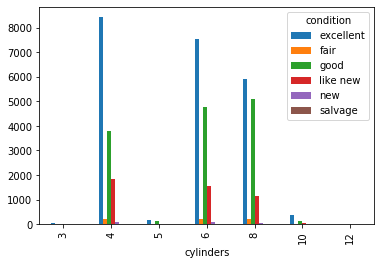

In [37]:
pd.crosstab(car_df1['cylinders'],car_df1['condition']).plot(kind='bar')

In [38]:
car_df1['cylinders']. value_counts()

4     14354
6     14164
8     12401
10      539
5       346
3        64
12        8
Name: cylinders, dtype: int64

# One Hot Encoding

In [39]:
car_df1.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive',
       'size', 'type', 'paint_color', 'image_url', 'state', 'lat', 'long',
       'posting_date', 'percent', 'cylinders'],
      dtype='object')

In [ ]:
#car_df2=pd.get_dummies(car_df1[['drive', 'size', 'type', 'paint_color']])

In [41]:
car_df2=pd.get_dummies(car_df1[[ 'price', 'year', 'manufacturer', 'model', 'condition',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive',
       'size', 'type', 'paint_color', 'percent', 'cylinders']])

In [42]:
car_df2.head()

,price,year,odometer,percent,cylinders,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,model_(300),model_- galaxie,model_-350 refrigerated box,model_/ edge,model_1 series,model_1-series,model_124 spider,model_128i,model_128i convertible,model_128i coupe,model_135i,model_135i convertible,model_135i m sport,model_15 passenger van,model_150 slt,model_1500,model_1500 ( 4wd ),model_1500 2wd,model_1500 4 door quad,model_1500 4-dr 4x4,model_1500 4x4,model_1500 4x4 crew cab,model_1500 4x4 express,model_1500 4x4 st,model_1500 4x4 truck,model_1500 4x4 v6,model_1500 avalanche ltz 4x4,model_1500 baja kts,model_1500 big horn,model_1500 big horn crew cab,model_1500 big horn quad cab,model_1500 bighorn,model_1500 bighorn 4x2,model_1500 bighorn quad cab,model_1500 cargo van,model_1500 classic,model_1500 classic slt crewcab 4x4,model_1500 classic truck,model_1500 crew cab,model_1500 crew cab 4wd v8,model_1500 crew cab 4x4,model_1500 crew cab 4x4 eco diesel,model_1500 crew cab express,model_1500 crew cab laramie,model_1500 crew cab lt,model_1500 crew cab sxt,model_1500 crew cab z71 4x4,model_1500 crew longhorn 4x4,model_1500 crewcab 4x4,model_1500 crewcab big horn,model_1500 ecodiesel,model_1500 express,model_1500 express 4x4,model_1500 express crew 4x4,model_1500 express quadcab 4x4,model_1500 laramie,model_1500 laramie 4wd,model_1500 laramie 4x4,model_1500 laramie crew cab,model_1500 laramie crewcab 4x4,model_1500 laramie limited,model_1500 laramie limited crew,model_1500 laramie longhorn,model_1500 laramie slt,model_1500 lone star,model_1500 longhorn,model_1500 mega cab,model_1500 promaster,model_1500 promaster van,model_1500 quad cab,model_1500 quad cab 4x4,model_1500 quad cab big horn 4x4,model_1500 quad cab express,model_1500 quad cab lone star,model_1500 quad cab slt,model_1500 quad cab slt rwd,model_1500 quadcab express 4x4,model_1500 rebel club cab 6.5 bed,model_1500 rebel loaded,model_1500 regular cab,model_1500 savana cargo van,model_1500 savana conversion van,model_1500 shorty van,model_1500 sierra,model_1500 sierra 4x4,model_1500 sierra denali,model_1500 silverado,model_1500 silverado 4x4,model_1500 silverado ltz,model_1500 slt,model_1500 slt 2005,model_1500 slt 2wd,model_1500 slt 4-door 4 wd,model_1500 slt 4x4,model_1500 slt crew cab,model_1500 slt crewcab,model_1500 slt crewcab 4x4,model_1500 slt hemi,model_1500 slt laramie,model_1500 slt quad cab,model_1500 sport,model_1500 sport 4x4,model_1500 sport truck,model_1500 st,model_1500 st 4x4,model_1500 st crew cab,model_1500 st crew cab 4x4,model_1500 st express,model_1500 step-side,model_1500 suburban,model_1500 sxt crew,model_1500 tradesman,model_1500 truck,model_1500 v6 4x2,model_1500 z71 4x4,model_1500/pk,model_1500￼,model_190e,model_2,model_2 door,model_2 hatchback,model_2 series,model_2-ton,model_2.5l z3 roadster,model_200,model_200 4dr sdn limited,model_200 limited,model_200 limited conv,model_200 lx,model_200 s,model_200 s awd,model_200 s convertible,model_200 sd,model_200 series limited,model_200 series lx c200 low,model_200 sport,model_200 touring,model_200 touring 4dr sedan,model_200 touring convertible,model_200 touring sedan,model_200-series,model_200c,model_200s,model_200sx se-r,model_2014 